In [2]:
%pip install tensorflow
%pip install numpy
%pip install pandas
%pip install matplotlib

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [3]:
from pathlib import Path
import imghdr
import os

data_dir = "hair_types"
# add there all your images file extensions
image_extensions = [".png", ".jpg"]

img_type_accepted_by_tf = ["bmp", "gif", "jpeg", "png"]
for filepath in Path(data_dir).rglob("*"):
    if filepath.suffix.lower() in image_extensions:
        img_type = imghdr.what(filepath)
        if img_type is None:
            print(f"{filepath} is not an image")
            os.remove(filepath)
        elif img_type not in img_type_accepted_by_tf:
            print(f"{filepath} is a {img_type}, not accepted by TensorFlow")
            os.remove(filepath)

C:\Users\JOSHUA KYLE\AppData\Local\Temp\ipykernel_3200\1025810437.py:2: DeprecationWarning: 'imghdr' is deprecated and slated for removal in Python 3.13
  import imghdr


hair_types\Curly_Hair\090617-header-mobile.jpg is a webp, not accepted by TensorFlow
hair_types\Curly_Hair\beautiful-young-woman-long-curly-260nw-1212622882.jpg is a webp, not accepted by TensorFlow
hair_types\Curly_Hair\blonde-girl-voluminous-curly-hair-600w-1432618526.jpg is a webp, not accepted by TensorFlow
hair_types\Curly_Hair\GettyImages-646055712_trans_NvBQzQNjv4BqDo1PhbPPiB1HBZscUHLBE78-ICSbD7iLWCuXgZfDuIk.jpg is a webp, not accepted by TensorFlow
hair_types\Curly_Hair\indian-baby-girl-curly-hair-600w-1664313094.jpg is a webp, not accepted by TensorFlow
hair_types\Curly_Hair\photo.jpg is a webp, not accepted by TensorFlow
hair_types\Curly_Hair\Untitled-8.jpg is a webp, not accepted by TensorFlow
hair_types\Straight_Hair\10100463715_c9aae924f1_z.jpg is not an image
hair_types\Straight_Hair\14280152025_6735cb2c8e_z.jpg is not an image


In [4]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

image_size = (64, 64)
batch_size = 32

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    "hair_types/",
    validation_split=0.2,
    subset="training",
    seed=1337,
    image_size=image_size,
    batch_size=batch_size,
    labels='inferred',
    label_mode='categorical'
)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    "hair_types/",
    validation_split=0.2,
    subset="validation",
    seed=1337,
    image_size=image_size,
    batch_size=batch_size,
    labels='inferred',
    label_mode='categorical'
)

Found 985 files belonging to 3 classes.
Using 788 files for training.
Found 985 files belonging to 3 classes.
Using 197 files for validation.


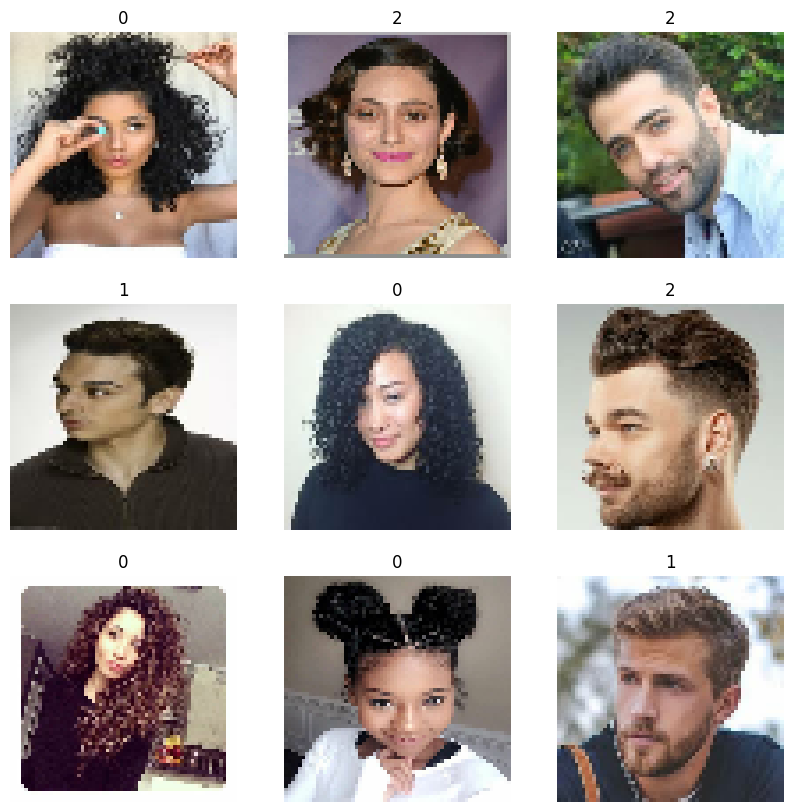

In [5]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(int(np.argmax(labels[i])))
        plt.axis("off")
plt.show()

In [6]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(keras.Input(shape=image_size + (3,)))  # 64, 64, 3
model.add(layers.Rescaling(1.0 / 255))

model.add(layers.Conv2D(filters=4, kernel_size=16,
          strides=1, padding='valid', dilation_rate=1))
model.add(layers.Activation("relu"))

model.add(layers.Conv2D(filters=8, kernel_size=8,
          strides=1, padding='valid', dilation_rate=1))
model.add(layers.Activation("relu"))

model.add(layers.Conv2D(filters=16, kernel_size=4,
          strides=1, padding='valid', dilation_rate=1))
model.add(layers.Activation("relu"))

model.add(layers.GlobalAveragePooling2D())
model.add(layers.Dense(64))
model.add(layers.Activation("relu"))
model.add(layers.Dense(3))
model.add(layers.Activation("softmax"))

tf.keras.utils.plot_model(model, to_file='model_test.png', show_shapes=True)

epochs = 50

model.compile(
    optimizer=keras.optimizers.Adam(1e-3),
    loss="categorical_crossentropy",
    metrics=["accuracy"],
)
model.fit(train_ds, epochs=epochs, validation_data=val_ds)

You must install pydot (`pip install pydot`) for `plot_model` to work.
Epoch 1/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 4s 81ms/step - accuracy: 0.3224 - loss: 1.1015 - val_accuracy: 0.2843 - val_loss: 1.0994
Epoch 2/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 82ms/step - accuracy: 0.3683 - loss: 1.0948 - val_accuracy: 0.2843 - val_loss: 1.0989
Epoch 3/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 77ms/step - accuracy: 0.3650 - loss: 1.0728 - val_accuracy: 0.4213 - val_loss: 1.0877
Epoch 4/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 79ms/step - accuracy: 0.4857 - loss: 1.0700 - val_accuracy: 0.4061 - val_loss: 1.0758
Epoch 5/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 76ms/step - accuracy: 0.4828 - loss: 1.0495 - val_accuracy: 0.4213 - val_loss: 1.0825
Epoch 6/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 75ms/step - accuracy: 0.4874 - loss: 1.0248 - val_accuracy: 0.4315 - val_loss: 1.0890
Epoch 7/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 75ms/step - accuracy: 0.4837 - loss: 1.0225 - val_accuracy: 0.4162 - val_loss: 1.0634
Epoch 8/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s

In [7]:
img = keras.preprocessing.image.load_img(
    "hair_types/Curly_Hair/02dac897d1dec9ba8c057a11d041ada8--layered-natural-hair-natural-black-hairstyles.jpg", target_size=image_size
)
img_array = keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)  # Create batch axis

predictions = model.predict(img_array)
print(
    "This image is %.2f percent curly hair, %.2f percent straight hair, and %.2f percent wavy hair."
    % tuple(predictions[0])
)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
This image is 0.95 percent curly hair, 0.04 percent straight hair, and 0.01 percent wavy hair.
